# General Notebook Description
The Bipoly solver is capable of computing all solutions presented in the ParkerSolarWind and IsopolySolarWind solvers, including fully isothermal, fully polytropic, and isopoly solutions, including separated thermal regime and expansion factor influence. In this Notebook, we present the functionality of the code mainly related to bipoly modeling. 

In [1]:
# Importation required to run this code
import bipoly_solar_wind_solve_and_plot as bpsw

## 1) Bi-fluid Isopoly Parker Solar Wind

First, we solve and iso-poly Parker solar wind solutions, to show that bipoly modeling also include isopoly modeling since it is a generalized version. For example, we model the fast wind population C from [Dakeyo et al. 2024b](https://www.aanda.org/articles/aa/full_html/2024/11/aa51272-24/aa51272-24.html) from the low expansion factor bin, with a small expansion factor of fm = 7, an early expansion r_exp = 1.7, and large expansion scale sig_exp = 0.2 (typical of coronal holes expansion). Please refer to [Dakeyo et al. 2024b](https://www.aanda.org/articles/aa/full_html/2024/11/aa51272-24/aa51272-24.html) for the complete table of bipoly parameters values.

### Code
The solution is retrieved with the inputs parameters :

In [2]:
# Length of the output model
N = 1e4
L = 1.496e11      # set to 1au by default

# Polytropic indexes
gamma_p_values = [1., 1.52] 
gamma_e_values = [1., 1.23]

# Coronal temperature
Tpc = 1.63e6
Tec = 0.71e6

# Isothermal radius (in solar radii)
r_poly_p = 13.6
r_poly_e = 10.3

# Expansion factor parameters
fm = 7
r_exp = 1.7          # in solar radii
sig_exp = 0.2       # in solar radii

where the inputs to change are : N is the number of points in the output python vector, Tpc[K] and Tec[K] are the protons and electron temperature respectively at the critical radius, gamma_p_values and gamma_e_values are the protons and electros bipoly polytropic indexes, fm is the final value of the expansion factor, r_exp[solar radii] and sig_exp[solar radii] are the expansion radius and length, respectively. The other inputs are set to an isothermal evolution. 

The outputs are the same as defined in the README file :

(r, n, u, Tp, Te, gamma_p, gamma_e, ind_rc f, bol_super) with, in the respective order, radial distance, density, bulk speed, proton temperature, electron temperature, proton polytropic index vector, electron polytropic index vector, python vector index of the sonic point (critical radius), expansion factor, and a bolean indicating the f-subsonic or f-supersonic type of solution.

### Plotting option
The plot options let the user choose which output quantity to display: f, gamma_p and gamma_e, a subplot with u, n, Tp and Te, and energy contributions. In this example, we plot everything except gamma_p and gamma_e, which are constant and equal to 1. 

In [3]:
#########################################
# Plotting option 
plot_f = True
plot_gamma = False

plot_unT = True
plot_energy = True
#########################################

The different energetic contribution are computed based on the Bernoulli equation: 

\begin{align}
    \int_{r_1}^{r_2} m_p u \frac{d u}{d r} dr
    + \int_{r_1}^{r_2} \sum_{s = \{p,e\} } \bigg(  \frac{ 1 }{n} \: \frac{d P_s }{ d r} \bigg) dr 
    + \int_{r_1}^{r_2} m_p \frac{G M}{r^2} dr = cte . 
    \quad \Rightarrow \quad
    \underbrace{m_p \frac{u^2}{2}}_{E_c}
    + \underbrace{\int_{r_1}^{r_2} \sum_{s = \{p,e\} } \bigg(  \frac{ k_B}{n} \: \frac{d (n T_s) }{ d r} \bigg) dr}_{E_{th}} 
    - \underbrace{m_p \frac{G M}{r}}_{E_g} = cte .
\end{align}

The conservation of total energy attests that the solver calculates the momentum equation with respect to the physical consideration intrinsic to the plasma thermodynamics and evolution. The main script that runs the solver and takes all the inputs provides plots as follows :


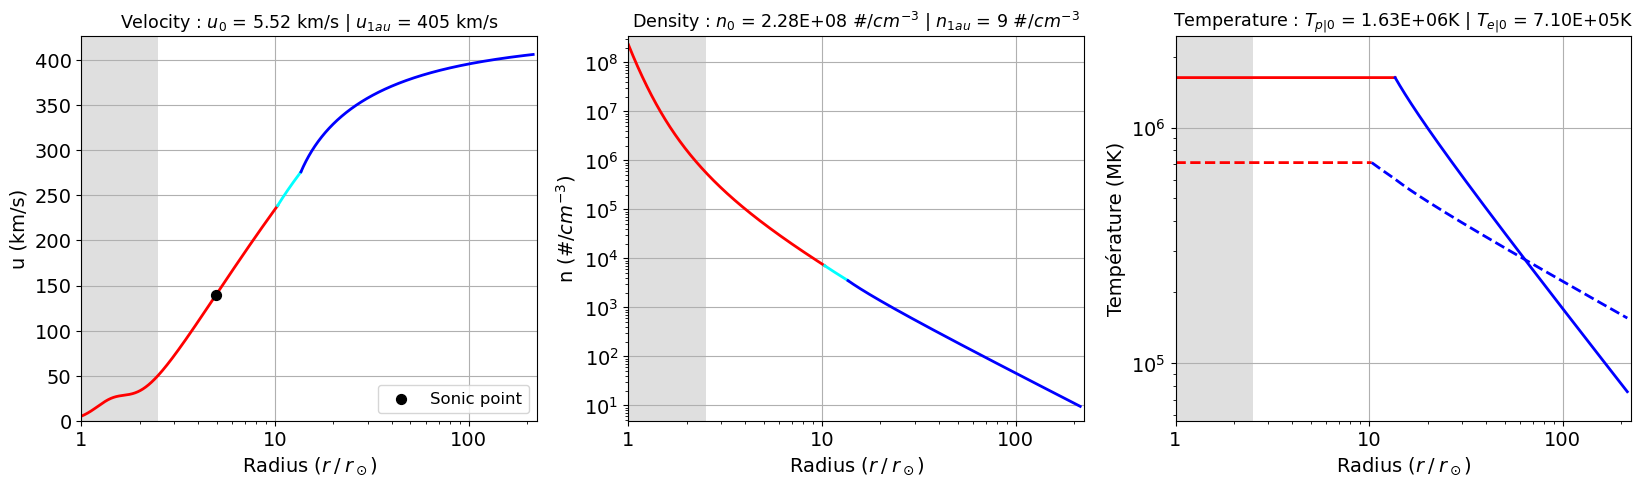

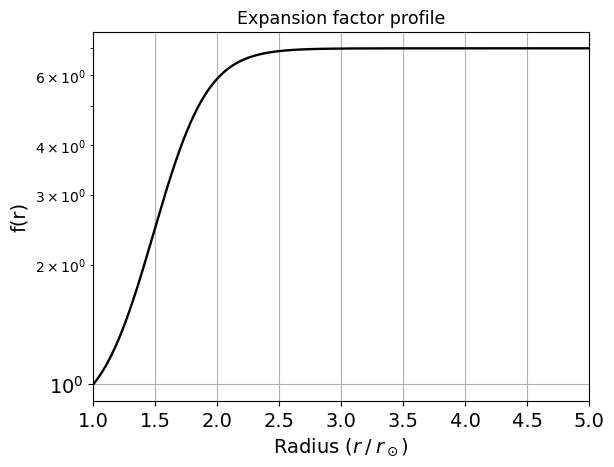

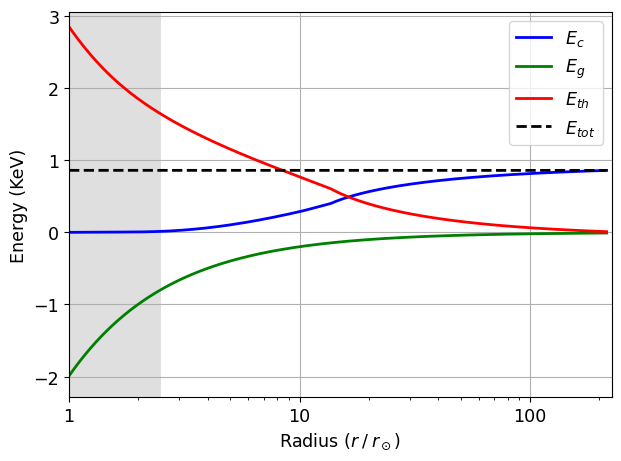

In [4]:
###############################################################
# Running the main function
(r, n, u, Tp, Te, gamma_p, gamma_e, ind_rc, f, bol_super) = bpsw.solve_bipoly(
                                        N, L, gamma_p_values, gamma_e_values, 
                                        Tpc, Tec, r_poly_p, r_poly_e,
                                        fm, r_exp, sig_exp, plot_f, 
                                        plot_gamma, plot_unT, 
                                        plot_energy)
###############################################################

## 2) Bi-fluid bipoly modeling 

In this example, the solar wind is assumed to embed to distinc polytropic regimes, the first one associated with $\gamma_{p0}$ and $\gamma_{e0}$ values from $1r_\odot$ out to the polytropic radius $r_{poly|p}$ and $r_{poly|e}$, and the second one associated with $\gamma_{p1}$ and $\gamma_{e1}$. 

As long as the solar wind goes supersonic inside the first polytropic region and remains locally supersonic across the discontinuity in sound speed at the $r_{poly}$ boundary, then accelerating trans-sonic solution exists for $r \rightarrow \infty$.

### 2.1) "Super-isothermal" polytropic index : $\gamma_0 > 1$ (f-subsonic case)
Firstly we consider the first thermal regime to be "super-isothermal", i.e. with polytropic indexes greater than 1. This results in a decrease of temperature in the first thermal regime which is not present in the isopoly modeling, that mainly depends on the polytropic index value. 

To illutrate this, we model the slow wind population A from [Dakeyo et al. 2024b](https://www.aanda.org/articles/aa/full_html/2024/11/aa51272-24/aa51272-24.html) from low expansion factor bin (same expansion parameters as in the "1)Bi-poly Isopoly" section).


- #### Remark :

Regarding the upper limit of $\gamma_{s0}$ values, according to [Parker 1958](https://ui.adsabs.harvard.edu/abs/1958ApJ...128..664P/abstract), the first thermal regime polytropic index require $(\gamma_{p0}, \gamma_{e0}) < 3/2$, to guarantee the existence of a transonic solar wind solution. However this is a limit condition, lower polytropic indexes values may not guarantee solar wind solution, this also depends to all the other inputs parameters. 



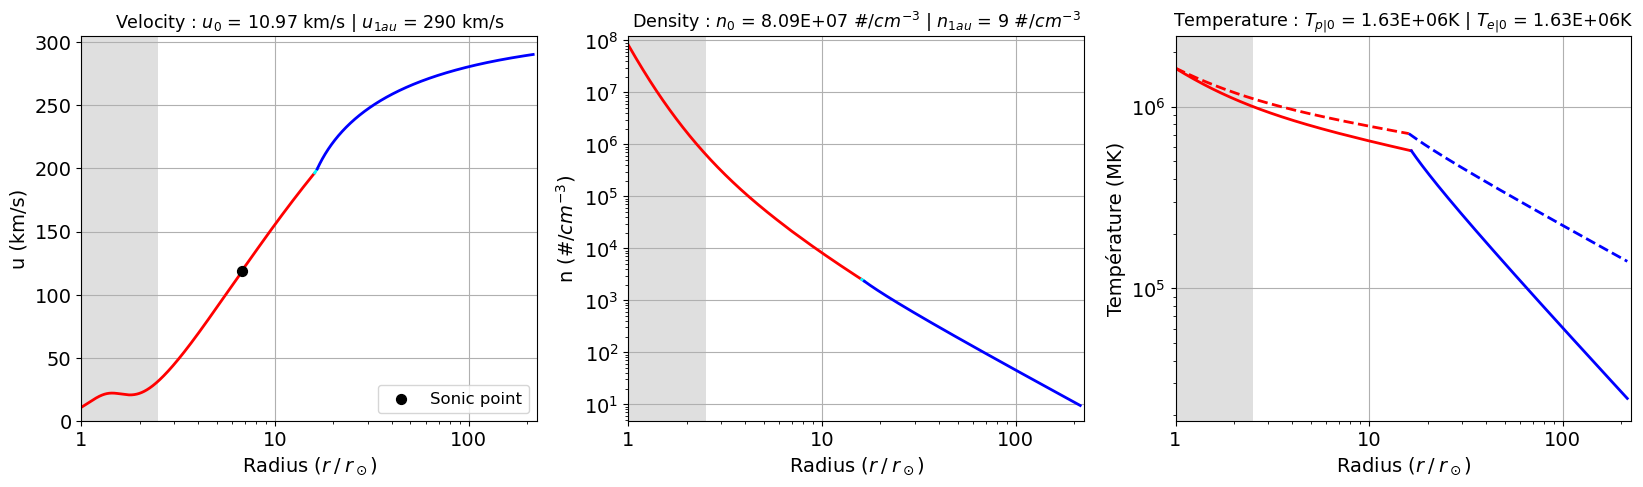

In [5]:
# Inputs of the model 
#########################################

# Length of the output model
N = 1e4
L = 1.496e11      # set to 1au by default

# Polytropic indexes
gamma_p_values = [1.10, 1.57] 
gamma_e_values = [1.08, 1.29]

# Coronal temperature
Tpc = 0.72e6
Tec = 0.85e6

# Isothermal radius (in solar radii)
r_poly_p = 16.5
r_poly_e = 16

# Expansion factor parameters
fm = 7
r_exp = 1.7            # in solar radii
sig_exp = 0.2       # in solar radii
#########################################
# Plotting option 
plot_f = False
plot_gamma = False

plot_unT = True
plot_energy = False
#########################################

###############################################################
# Running the main function
(r, n, u, Tp, Te, gamma_p, gamma_e, ind_rc, f, bol_super) = bpsw.solve_bipoly(
                                        N, L, gamma_p_values, gamma_e_values, 
                                        Tpc, Tec, r_poly_p, r_poly_e,
                                        fm, r_exp, sig_exp, plot_f, 
                                        plot_gamma, plot_unT, 
                                        plot_energy)
###############################################################


The curves shown above are associated to an "f-subsonic" solution, for which the wind speed is fully subsonic (below the sound speed) in the region of super expansion. The result for "f-supersonic" solution (partially supersonic in the super expansion region) leads to stronger variation of the plasma properties (bulk speed, density and temperature). 

### 2.2) "Super-isothermal" polytropic index : $\gamma_0 > 1$          (f-supersonic case)
As example for the f-supersonic solution type, we take the same wind populations (population A from [Dakeyo et al. 2024b](https://www.aanda.org/articles/aa/full_html/2024/11/aa51272-24/aa51272-24.html)), but considering large expansion factor bin with fm = 100, moderately late expansion r_exp = 1.9 $r_{\odot}$, and moderately expansion scale sig_exp = 0.1 (typical of streamer expansion).
The other bipoly input parameters also change, refer to [Dakeyo et al. 2024b](https://www.aanda.org/articles/aa/full_html/2024/11/aa51272-24/aa51272-24.html) for the table of values. 

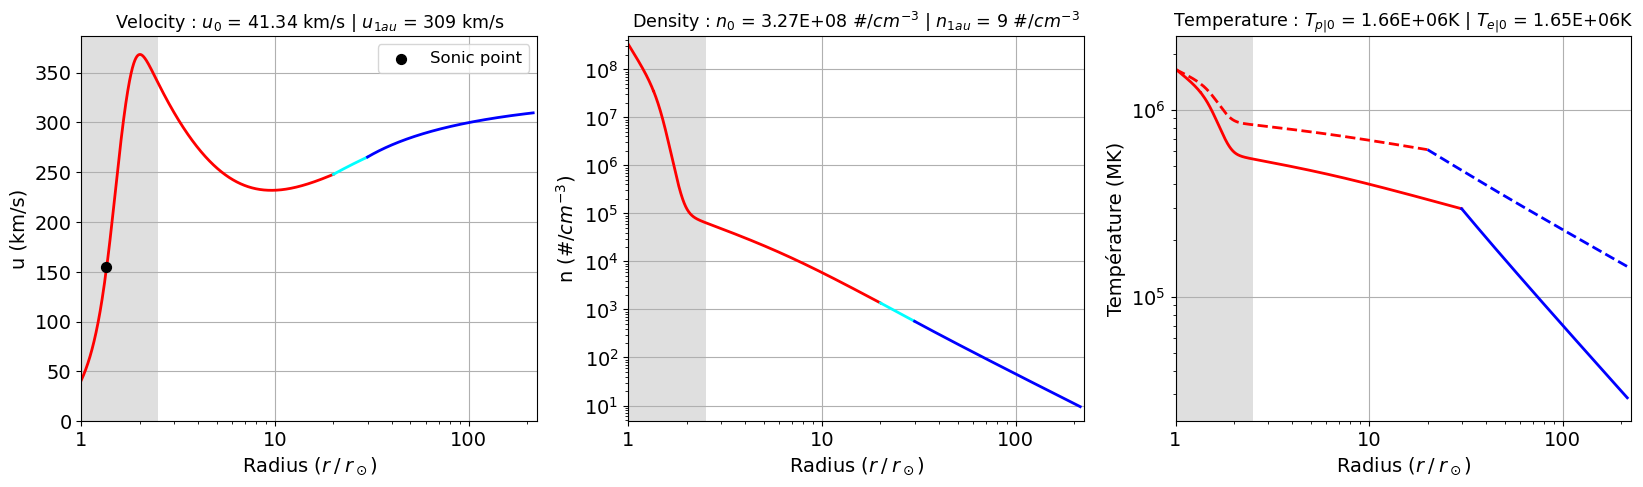

In [6]:
# Inputs of the model 
#########################################

# Length of the output model
N = 1e4
L = 1.496e11      # set to 1au by default

# Polytropic indexes
gamma_p_values = [1.13, 1.57] 
gamma_e_values = [1.08, 1.29]

# Coronal temperature
Tpc = 1.24e6
Tec = 1.38e6

# Isothermal radius (in solar radii)
r_poly_p = 30
r_poly_e = 20

# Expansion factor parameters
fm = 100
r_exp = 1.9            # in solar radii
sig_exp = 0.1       # in solar radii
#########################################
# Plotting option 
plot_f = False
plot_gamma = False

plot_unT = True
plot_energy = False
#########################################

###############################################################
# Running the main function
(r, n, u, Tp, Te, gamma_p, gamma_e, ind_rc, f, bol_super) = bpsw.solve_bipoly(
                                        N, L, gamma_p_values, gamma_e_values, 
                                        Tpc, Tec, r_poly_p, r_poly_e,
                                        fm, r_exp, sig_exp, plot_f, 
                                        plot_gamma, plot_unT, 
                                        plot_energy)
###############################################################


### 2.3) "Sub-isothermal" polytropic index : $\gamma_0 < 1$ (f-subsonic case)
Here we consider the first thermal regime to be "sub-isothermal", i.e. with polytropic indexes lesser than 1. This results in an increase of temperature in the first thermal regime.

To illutrate this, we model the medium-fast wind population D from [Dakeyo et al. 2024b](https://www.aanda.org/articles/aa/full_html/2024/11/aa51272-24/aa51272-24.html) which include sub-isothermal $\gamma_{p0}. The  expansion parameters are taken for the low expansion factor bin from the same study, typical of coronal hole expansion (same expansion parameters as in the section "1)Bi-poly Isopoly").


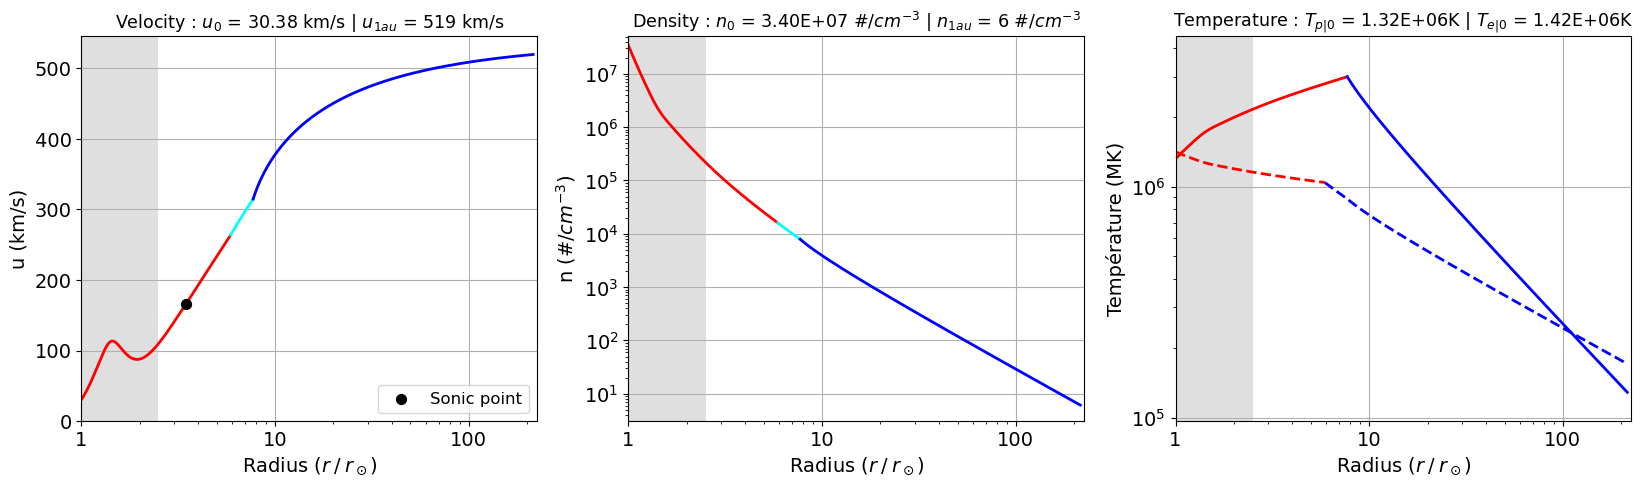

In [7]:
# Inputs of the model 
#########################################

# Length of the output model
N = 1e4
L = 1.496e11      # set to 1au by default

# Polytropic indexes
gamma_p_values = [0.902, 1.44] 
gamma_e_values = [1.040, 1.23]

# Coronal temperature
Tpc = 2.41e6
Tec = 1.11e6

# Isothermal radius (in solar radii)
r_poly_p = 7.7
r_poly_e = 5.9

# Expansion factor parameters
fm = 7
r_exp = 1.7            # in solar radii
sig_exp = 0.2       # in solar radii
#########################################
# Plotting option 
plot_f = False
plot_gamma = False

plot_unT = True
plot_energy = False
#########################################

###############################################################
# Running the main function
(r, n, u, Tp, Te, gamma_p, gamma_e, ind_rc, f, bol_super) = bpsw.solve_bipoly(
                                        N, L, gamma_p_values, gamma_e_values, 
                                        Tpc, Tec, r_poly_p, r_poly_e,
                                        fm, r_exp, sig_exp, plot_f, 
                                        plot_gamma, plot_unT, 
                                        plot_energy)
###############################################################


The curves shown above are associated to an "f-subsonic" solution, as for the super-isothermal case, the f-supersonic solution type is also presented. 

### 2.4) "Sub-isothermal" polytropic index : $\gamma_0 < 1$          (f-supersonic case)
As example for the f-supersonic solution type, we take the fast wind populations E which illustrate the best the effect of the super expansion region (from [Dakeyo et al. 2024b](https://www.aanda.org/articles/aa/full_html/2024/11/aa51272-24/aa51272-24.html)), considering the same large expansion factor bin as in section 2.2).

- Note : Magnetic corridor's expansion, from which may comes from the modeled fast wind in this example, could be represented by the typical streamer expansion).

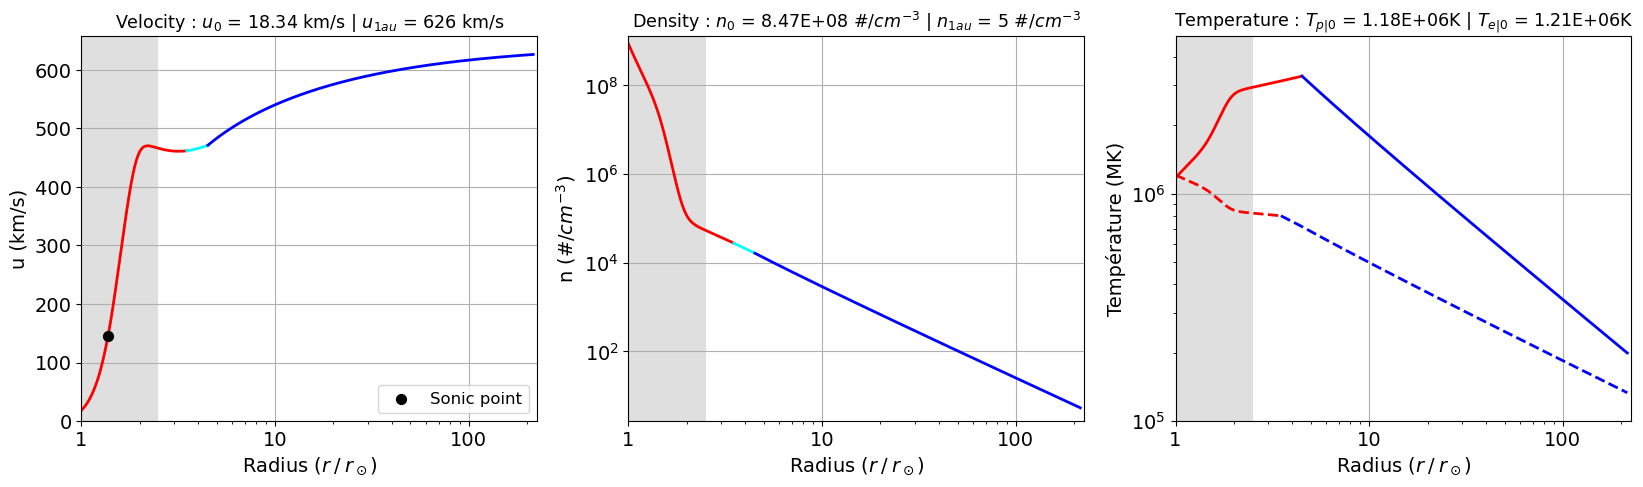

In [8]:
# Inputs of the model 
#########################################

# Length of the output model
N = 6e4         # (Note : the number of points N has been inscreased compared to previous cases)
L = 1.496e11      # set to 1au by default

# Polytropic indexes
gamma_p_values = [0.905, 1.35] 
gamma_e_values = [1.040, 1.21]

# Coronal temperature
Tpc = 1.575e6
Tec = 1.070e6

# Isothermal radius (in solar radii)
r_poly_p = 4.5
r_poly_e = 3.5

# Expansion factor parameters
fm = 100
r_exp = 1.9          # in solar radii
sig_exp = 0.1       # in solar radii
#########################################
# Plotting option 
plot_f = False
plot_gamma = False

plot_unT = True
plot_energy = False
#########################################

###############################################################
# Running the main function
(r, n, u, Tp, Te, gamma_p, gamma_e, ind_rc, f, bol_super) = bpsw.solve_bipoly(
                                        N, L, gamma_p_values, gamma_e_values, 
                                        Tpc, Tec, r_poly_p, r_poly_e,
                                        fm, r_exp, sig_exp, plot_f, 
                                        plot_gamma, plot_unT, 
                                        plot_energy)
###############################################################


## Inputs values recommandations
The values of the inputs affect the existence of a solar wind solution. In order to be as easy as possible in the case of existence of solution, we provide here values interval for which the numerical resolution can be operated nicely. The values are indicative and do not represent a strict interval for the existence of a solar wind solution. However, if all values are in the interval, increasing the number of points of the output vector up to $N = 10^5$ may help to find an existing solar wind solution.


$$
\left\{
    \begin{array}{cc}
        \text{Resolution :}& \qquad N \geq 10^3 \quad \text{for} \quad L = 1au \\
        \text{Polytropic indexes :} &\qquad 0.7 \: \leq \: (\gamma_{p0}, \gamma_{e0}) \: \leq \: 1.5 \quad \text{and} \quad
        1 \: \leq \: (\gamma_{p1}, \gamma_{e1}) \: \leq \: 5/3 \\
         \text{Temperature :} &\qquad 0.6 \: \text{MK} \: \lesssim \: (T_{pc}, T_{ec}) \: \lesssim \: 5 \: \text{MK} \\
         \text{Polytropic radii} &\qquad 1.05 \times r_c \: \lesssim \: (r_{poly|p}, r_{poly|e}) \: \lesssim \: 35 \: r_\odot
    \end{array}
\right.
$$

In [9]:
import streamline_calc_dakeyo2024a as stream 

## Streamline tracing : Parker's like spiral 

This next part of the notebook example complements the isopoly modeling to model the wind streamline (i.e., Parker's-like spiral) associated with the previously computed isopoly solution. The back-mapping computational method follows the work of ([Dakeyo et al. 2024a](https://ui.adsabs.harvard.edu/abs/2024A%26A...686A..12D/abstract)), which includes the radial acceleration of the wind and the corotational effect that results in the tangential velocity. Both features affect the streamline tracing and cannot be considered separately.  

The streamline calculation is actived setting the bolean : 

In [10]:
stream_calc = True

and the plotting of the streamline is allowed setting :

In [11]:
plot_streamline = True

The streamline input allows to select the starting angular Carrington coordinates (probe location) from which it is computed. 
These outputs are, in order (r_phi, phi, v_alf, u_phi), the radial distance associated with the local streamline angle, the local streamline angle, the local Alfvèn velocity, and the tangential bulk velocity. 

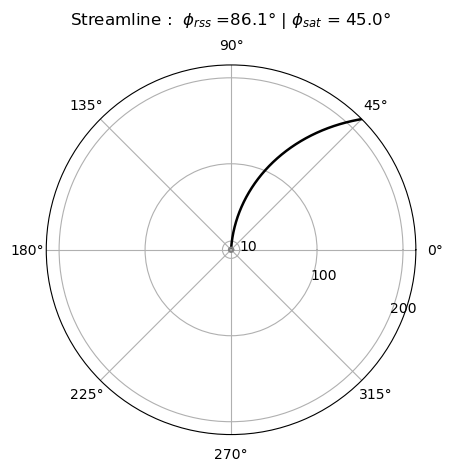

In [12]:
#########################################
# Streamline tracing 
#########################################
# Probe location for streamline tracing
phi_sat = 45     # in degrees

# Streamline calculation
if(stream_calc):
    (r_phi, phi, v_alf, u_phi) = stream.streamline_calc(r, n, u, phi_sat, plot_streamline)  
###############################################################